In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [2]:
df= pd.read_csv('resume_dataset.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [6]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [7]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [8]:
df['Category'].nunique()

25

In [9]:
categories = df['Category'].value_counts().reset_index()
categories

,Category,count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


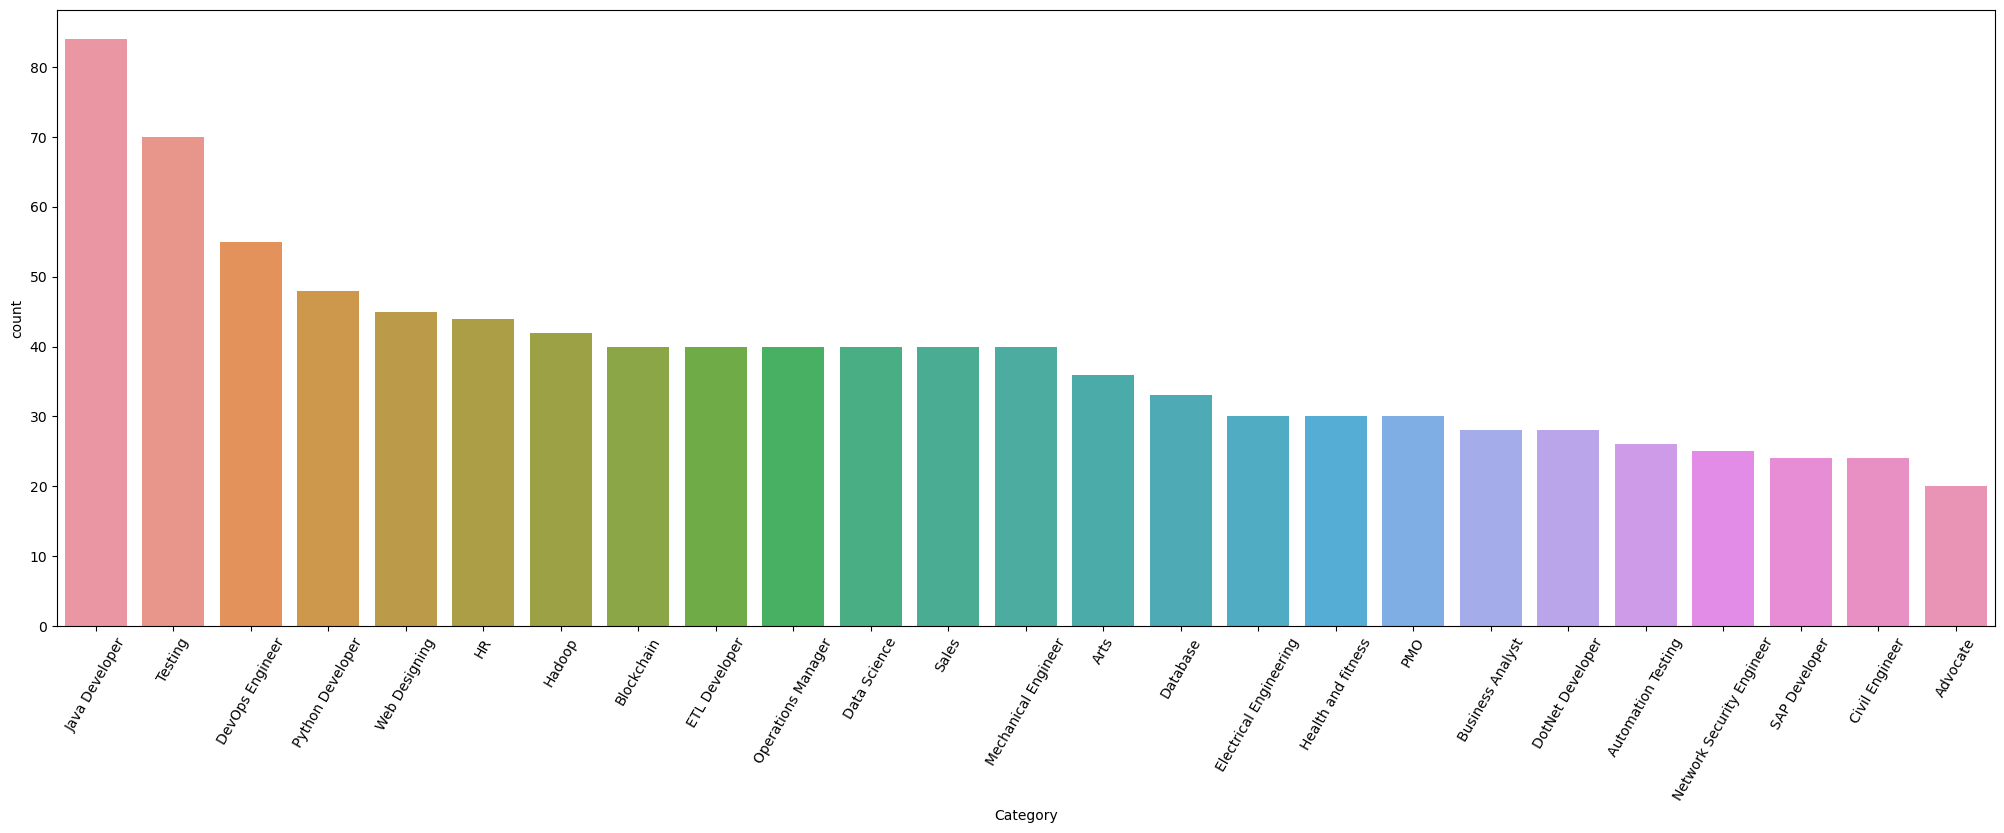

In [10]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=60)
# count plot on single categorical variable
sns.countplot(x ='Category', data= df, order= df['Category'].value_counts().index)

# Show the plot
plt.show()

In [11]:
# plt.figure(figsize=(25,8))

# #define Seaborn color palette to use
# colors= sns.color_palette('bright')[0:5]

# #create pie chart
# plt.pie(categories['Category'], labels= categories['index'], colors = colors, autopct='%.1f%%')
# plt.show()

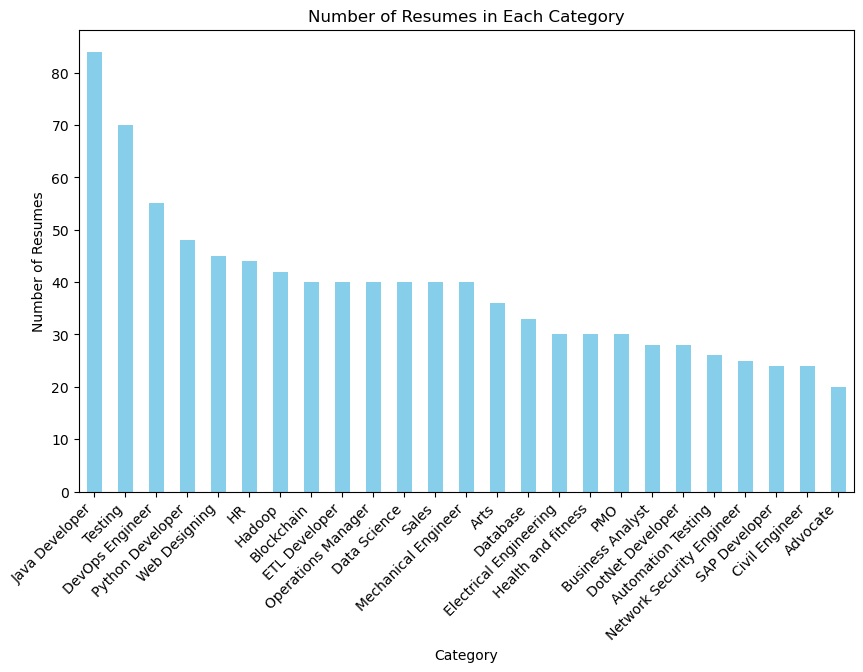

In [12]:
# Counting the number of resumes for each category
resume_counts = df['Category'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
resume_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Resumes')
plt.title('Number of Resumes in Each Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Data Preprocessing

In [13]:
df1= df.copy()
df1['cleaned_resume']= ""
df1

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


Removing Special Characters and punctuations

In [14]:
import re
def clean_function(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [15]:
df1['cleaned_resume'] = df1['Resume'].apply(lambda x: clean_function(x))
df1.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


Encoding the Category Column

In [16]:
from sklearn.preprocessing import LabelEncoder
df2= df1.copy()
df2['Category']= LabelEncoder().fit_transform(df2['Category'])
df2.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


Creating WordCloud

In [17]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aleem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
SetOfStopWords= set(stopwords.words('english')+['``',"''"])

In [20]:
totalWords= []
Sentences= df2['Resume'].values
cleanedSentences= ""

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aleem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
for records in Sentences:
    cleanedText= clean_function(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in SetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

In [23]:
frequent_words = nltk.FreqDist(totalWords)

In [24]:
frequent_words

FreqDist({'Exprience': 3829, 'months': 3233, 'company': 3130, 'Details': 2967, 'description': 2634, '1': 2134, 'Project': 1808, 'project': 1579, '6': 1499, 'data': 1438, ...})

In [25]:
mostcommon = frequent_words.most_common(30)
mostcommon

[('Exprience', 3829),
 ('months', 3233),
 ('company', 3130),
 ('Details', 2967),
 ('description', 2634),
 ('1', 2134),
 ('Project', 1808),
 ('project', 1579),
 ('6', 1499),
 ('data', 1438),
 ('team', 1424),
 ('Maharashtra', 1385),
 ('year', 1244),
 ('Less', 1137),
 ('January', 1086),
 ('using', 1041),
 ('Skill', 1018),
 ('Pune', 1016),
 ('Management', 1010),
 ('SQL', 990),
 ('Ltd', 934),
 ('management', 927),
 ('C', 896),
 ('Engineering', 855),
 ('Education', 833),
 ('Developer', 806),
 ('Java', 773),
 ('2', 754),
 ('development', 752),
 ('monthsCompany', 746)]

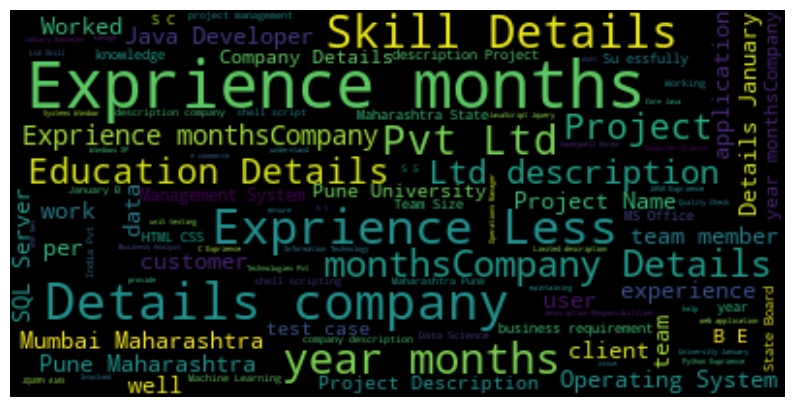

In [26]:
WordCloud= WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Building Models

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack


In [28]:
Text= df2['cleaned_resume'].values
Target= df2['Category'].values

In [29]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
word_vectorizer.fit(Text)
WordFeatures= word_vectorizer.transform(Text)

In [30]:
WordFeatures.shape

(962, 7351)

In [31]:
X_train,X_test,y_train,y_test= train_test_split(WordFeatures, Target, random_state=42)


In [32]:
print(X_train.shape)
print(X_test.shape)

(721, 7351)
(241, 7351)


In [33]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

In [34]:
preprocessor = make_pipeline(StandardScaler(with_mean=False), TruncatedSVD(n_components=50))

In [35]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [36]:
# Define the models

models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

In [37]:
# Create a list of OneVsRestClassifier instances for each model

model_list = [OneVsRestClassifier(model) for model in models.values()]

In [38]:
# Train the models

for model in model_list:
    model.fit(X_train_processed, y_train)
    print(f'{model} trained')

print("*" * 60)
print("All models trained")

OneVsRestClassifier(estimator=KNeighborsClassifier()) trained
OneVsRestClassifier(estimator=LogisticRegression()) trained
OneVsRestClassifier(estimator=SVC()) trained
OneVsRestClassifier(estimator=RandomForestClassifier()) trained
OneVsRestClassifier(estimator=GaussianNB()) trained
OneVsRestClassifier(estimator=DecisionTreeClassifier()) trained
************************************************************
All models trained


In [39]:
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [40]:
# Evaluate the models
for count, model in enumerate(model_list):
    print(f"Accuracy of {model} on training set:", model_list[count].score(X_train_processed, y_train))
    print(f"Accuracy of {model} on test set:", model_list[count].score(X_test_processed, y_test))

    # Add this part to avoid the decision_function error for KNeighborsClassifier
    try:
        print(f'{model} classification report')
        print("-" * 80)
        print(classification_report(y_test, model_list[count].predict(X_test_processed)))
        print("*" * 100)
    except AttributeError:
        print(f"{model} does not have decision_function attribute")

    print(" ")

Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on training set: 0.9389736477115118
Accuracy of OneVsRestClassifier(estimator=KNeighborsClassifier()) on test set: 0.8464730290456431
OneVsRestClassifier(estimator=KNeighborsClassifier()) classification report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.89      1.00      0.94         8
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00        10
           4       0.62      1.00      0.77         5
           5       1.00      0.22      0.36         9
           6       1.00      0.56      0.71         9
           7       1.00      0.78      0.88         9
           8       1.00      0.88      0.94        17
           9       1.00      0.30      0.46        10
          10       1.00      1.00      1.00     

Cross Validation for Models


In [41]:
# from sklearn.model_selection import cross_val_score, KFold

In [42]:
# results = {}

In [43]:
# kf = KFold(n_splits= 10)

In [44]:
# for count, value in enumerate(model_list):
#     result = cross_val_score(model_list[count], X_train, y_train, scoring= 'accuracy', cv= kf)
#     results[value] = result                                                                             # original code

In [45]:
# from sklearn.model_selection import cross_val_predict, KFold
# from sklearn.metrics import accuracy_score

# results = {}
# kf = KFold(n_splits=10)
#                                                                                 # alternate code but not working
# for count, model in enumerate(model_list):
#     # Perform cross-validation and obtain predictions
#     y_pred = cross_val_predict(model, X_train, y_train, cv=kf)

#     # Calculate accuracy
#     accuracy = accuracy_score(y_train, y_pred)

#     results[str(model)] = accuracy

# # Print the results
# for model, accuracy in results.items():
#     print(f'{model} Cross-Validation Accuracy: {accuracy:.4f}')
#     print('*' * 80)
